# AlexNet with Roboflow flowers dataset on local CPU

Import required libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

2022-05-25 17:43:58.521534: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-25 17:43:58.521592: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Show the tensorflow version

In [3]:
print(tf.version.VERSION)

2.9.1


Install libraries to save tf model

In [6]:
!pip install pyyaml h5py matplotlib tensorflow_datasets

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


## Download the dataset

In [4]:
!curl -L "https://public.roboflow.com/ds/g37Gqyj0TS?key=UhfWebAhuQ" > dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0   889    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100   889  100   889    0     0    889      0  0:00:01  0:00:01 --:--:--   522

  0 59.9M    0  1839    0     0    919      0 18:59:14  0:00:02 18:59:12   919
 17 59.9M   17 10.5M    0     0  3610k      0  0:00:16  0:00:03  0:00:13 10.5M
 39 59.9M   39 23.6M    0     0  6056k      0  0:00:10  0:00:04  0:00:06 11.8M
 66 59.9M   66 40.1M    0     0  8214k      0  0:00:07  0:00:05  0:00:02 13.3M
 95 59.9M   95 56.9M    0     0  9720k      0  0:00:06  0:00:06 --:--:-- 14.2M
100 59.9M  100 59.9M    0     0   9.9M      0  0:00:06  0:00:06 --:--:-- 14.4M


Print current directory

In [5]:
%pwd

'/workspace'

## Create `images` folder

In [6]:
# newpath = r'images' 
# if not os.path.exists(newpath):
#     os.makedirs(newpath)

## Unzip the dataset

In [4]:
import zipfile
with zipfile.ZipFile("datasets/flowers.zip", 'r') as zip_ref:
    zip_ref.extractall("datasets/")

## Install Tensorflow Datasets

In [8]:
!pip install tensorflow_datasets

## Import the dataset

In [5]:
import tensorflow_datasets as tfds
builder = tfds.folder_dataset.ImageFolder('datasets/flowers')
print(builder.info)
train_ds = builder.as_dataset(split='train', shuffle_files=True)
test_ds = builder.as_dataset(split='test', shuffle_files=True)
valid_ds = builder.as_dataset(split='valid', shuffle_files=True)

/home/roman/.venv/dl/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-05-25 17:44:57.125657: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


tfds.core.DatasetInfo(
    name='image_folder',
    full_name='image_folder/1.0.0',
    description="""
    Generic image classification dataset.
    """,
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    data_path='datasets/flowers',
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=182, num_shards=1>,
        'train': <SplitInfo num_examples=6375, num_shards=1>,
        'valid': <SplitInfo num_examples=364, num_shards=1>,
    },
    citation="""""",
)


2022-05-25 17:44:57.866084: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-25 17:44:57.866149: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-25 17:44:57.866172: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-AI001R0): /proc/driver/nvidia/version does not exist
2022-05-25 17:44:57.866444: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Show several train examples

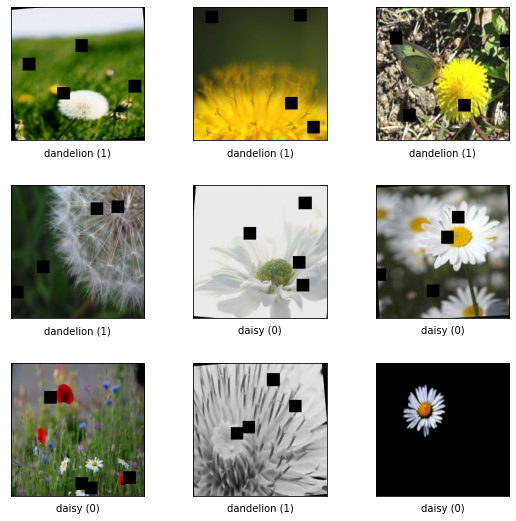

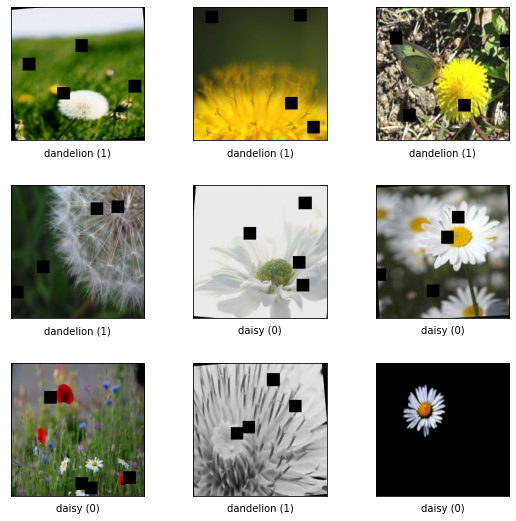

In [6]:
tfds.show_examples(train_ds, builder.info)

## Normalize and resize the dataset

In [7]:
def process_image(example):
    image, label = example['image'], example['label']
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    # Resize images to 224x224
    image = tf.image.resize(image, (224,224))
    return image, label

In [8]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
valid_ds_size = tf.data.experimental.cardinality(valid_ds).numpy()
print("Training data size:", train_ds_size)
print("Test data size:", test_ds_size)
print("Validation data size:", valid_ds_size)

Training data size: 6375
Test data size: 182
Validation data size: 364


## Shuffle the dataset and prepare batch generator

In [9]:
BATCH_SIZE = 128
train_ds = (train_ds
                  .map(process_image)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=BATCH_SIZE, drop_remainder=True))
test_ds = (test_ds
                  .map(process_image)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=BATCH_SIZE, drop_remainder=True))
valid_ds = (valid_ds
                  .map(process_image)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=BATCH_SIZE, drop_remainder=True))

## Function to construct AlexNet model

In [10]:
def create_model():
    model = keras.models.Sequential([
        keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4096, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(2, activation='softmax')
    ])

    model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=False),
                loss=tf.losses.SparseCategoricalCrossentropy(),
                metrics=[tf.metrics.SparseCategoricalAccuracy()])

    return model

## Log training data for tensorboard

In [12]:
# root_logdir = os.path.join(os.curdir, "log/fit/")
logdir = os.path.join("logs", time.strftime("%Y%m%d-%H%M%S"))
# def get_run_logdir():
#     run_id = time.strftime("%Y%m%d-%H%M%S")
#     return os.path.join(root_logdir, run_id)
# run_logdir = get_run_logdir()
# tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

## Create a callback to save the model during training

In [13]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "training_local_128b20e/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq='epoch')

## Create a basic model instance

In [14]:
# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 256)      1024      
 hNormalization)                                                 
                                                        

In [15]:
# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

## Train the data

In [16]:
# tensorboard --logdir=data/ --host localhost --port 8088
%load_ext tensorboard
%tensorboard --logdir logs

In [17]:
tic = time.perf_counter()
history = model.fit(train_ds,
          epochs=20,
          validation_data=valid_ds,
          validation_freq=1,
          callbacks=[tensorboard_callback, cp_callback])
toc = time.perf_counter()
print(f"Trained the dataset in {toc - tic:0.4f} seconds")

Epoch 1/20
49/49 [==============================] - ETA: 0s - loss: 0.7184 - sparse_categorical_accuracy: 0.6408

2022-05-25 17:52:06.819883: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 6291456000 exceeds 10% of free system memory.
2022-05-25 17:52:20.671543: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 4026531840 exceeds 10% of free system memory.



Epoch 1: saving model to training_local_128b20e/cp-0001.ckpt
49/49 [==============================] - 232s 5s/step - loss: 0.7184 - sparse_categorical_accuracy: 0.6408 - val_loss: 0.6373 - val_sparse_categorical_accuracy: 0.7109
Epoch 2/20


2022-05-25 17:52:39.160671: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 4092 of 6375
2022-05-25 17:52:41.360468: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


49/49 [==============================] - ETA: 0s - loss: 0.4704 - sparse_categorical_accuracy: 0.7827

2022-05-25 17:56:07.767253: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 6291456000 exceeds 10% of free system memory.
2022-05-25 17:56:37.187199: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 4026531840 exceeds 10% of free system memory.



Epoch 2: saving model to training_local_128b20e/cp-0002.ckpt
49/49 [==============================] - 255s 5s/step - loss: 0.4704 - sparse_categorical_accuracy: 0.7827 - val_loss: 0.5621 - val_sparse_categorical_accuracy: 0.7227
Epoch 3/20
49/49 [==============================] - ETA: 0s - loss: 0.3705 - sparse_categorical_accuracy: 0.8390

2022-05-25 18:00:24.505455: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 6291456000 exceeds 10% of free system memory.



Epoch 3: saving model to training_local_128b20e/cp-0003.ckpt
49/49 [==============================] - 244s 5s/step - loss: 0.3705 - sparse_categorical_accuracy: 0.8390 - val_loss: 0.5761 - val_sparse_categorical_accuracy: 0.7031
Epoch 4/20


2022-05-25 18:00:58.768297: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 4276 of 6375
2022-05-25 18:01:03.902887: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


49/49 [==============================] - ETA: 0s - loss: 0.3170 - sparse_categorical_accuracy: 0.8616
Epoch 4: saving model to training_local_128b20e/cp-0004.ckpt
49/49 [==============================] - 287s 6s/step - loss: 0.3170 - sparse_categorical_accuracy: 0.8616 - val_loss: 0.5731 - val_sparse_categorical_accuracy: 0.7617
Epoch 5/20


2022-05-25 18:05:46.579101: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2204 of 6375
2022-05-25 18:05:56.127802: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 6036 of 6375
2022-05-25 18:05:56.957413: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


49/49 [==============================] - ETA: 0s - loss: 0.2698 - sparse_categorical_accuracy: 0.8879
Epoch 5: saving model to training_local_128b20e/cp-0005.ckpt
49/49 [==============================] - 259s 5s/step - loss: 0.2698 - sparse_categorical_accuracy: 0.8879 - val_loss: 0.3861 - val_sparse_categorical_accuracy: 0.8203
Epoch 6/20
16/49 [========>.....................] - ETA: 2:26 - loss: 0.2274 - sparse_categorical_accuracy: 0.9106


KeyboardInterrupt



## Save the entire model to a HDF5 file

In [20]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('AlexNet_local_128b20e.h5')

## Create a single collection of TensorFlow checkpoint files that are updated at the end of each epoch

In [21]:
os.listdir(checkpoint_dir)

['checkpoint',
 'cp-0000.ckpt.data-00000-of-00001',
 'cp-0000.ckpt.index',
 'cp-0001.ckpt.data-00000-of-00001',
 'cp-0001.ckpt.index',
 'cp-0002.ckpt.data-00000-of-00001',
 'cp-0002.ckpt.index',
 'cp-0003.ckpt.data-00000-of-00001',
 'cp-0003.ckpt.index',
 'cp-0004.ckpt.data-00000-of-00001',
 'cp-0004.ckpt.index',
 'cp-0005.ckpt.data-00000-of-00001',
 'cp-0005.ckpt.index',
 'cp-0006.ckpt.data-00000-of-00001',
 'cp-0006.ckpt.index',
 'cp-0007.ckpt.data-00000-of-00001',
 'cp-0007.ckpt.index',
 'cp-0008.ckpt.data-00000-of-00001',
 'cp-0008.ckpt.index',
 'cp-0009.ckpt.data-00000-of-00001',
 'cp-0009.ckpt.index',
 'cp-0010.ckpt.data-00000-of-00001',
 'cp-0010.ckpt.index',
 'cp-0011.ckpt.data-00000-of-00001',
 'cp-0011.ckpt.index',
 'cp-0012.ckpt.data-00000-of-00001',
 'cp-0012.ckpt.index',
 'cp-0013.ckpt.data-00000-of-00001',
 'cp-0013.ckpt.index',
 'cp-0014.ckpt.data-00000-of-00001',
 'cp-0014.ckpt.index',
 'cp-0015.ckpt.data-00000-of-00001',
 'cp-0015.ckpt.index',
 'cp-0016.ckpt.data-00000

In [22]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training_local_128b20e\\cp-0020.ckpt'

## Visualize the training results

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


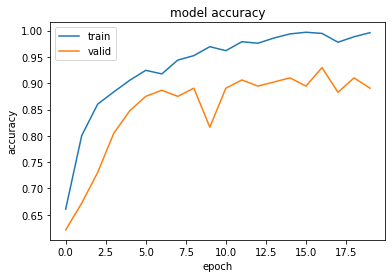

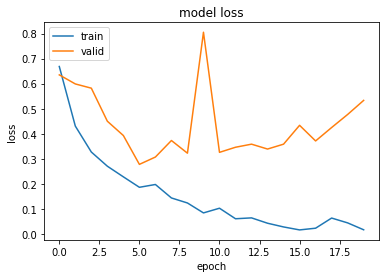

In [23]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

## Optionally, open tensorboard for metrics analysis

In [24]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
# %load_ext tensorboard
# %tensorboard --logdir Repositories/alexnet/log

## Evaluate the model on the test data

In [25]:
loss, acc = model.evaluate(test_ds)
print("Model accuracy: {:5.2f}%".format(100 * acc))

1/1 [==============================] - 1s 1s/step - loss: 0.5213 - sparse_categorical_accuracy: 0.9062
Model accuracy: 90.62%


## Load saved model

In [26]:
# Create a basic model instance
model = create_model()

# Evaluate the model
loss, acc = model.evaluate(test_ds, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

1/1 - 1s - loss: 0.7030 - sparse_categorical_accuracy: 0.3750 - 1s/epoch - 1s/step
Untrained model, accuracy: 37.50%


In [27]:
# Loads the weights
model.load_weights(latest)

# Re-evaluate the model
loss, acc = model.evaluate(test_ds, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

1/1 - 1s - loss: 0.4803 - sparse_categorical_accuracy: 0.9141 - 979ms/epoch - 979ms/step
Restored model, accuracy: 91.41%


In [28]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('AlexNet_local_128b20e.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 256)      1024      
 hNormalization)                                                 
                                                        

In [29]:
loss, acc = new_model.evaluate(test_ds, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

1/1 - 1s - loss: 0.5807 - sparse_categorical_accuracy: 0.9062 - 1s/epoch - 1s/step
Restored model, accuracy: 90.62%


## Import trained model from TWCC to local machine

In [30]:
# Recreate the exact same model, including its weights and the optimizer
twcc_model = tf.keras.models.load_model('AlexNet_128b20e.h5')

# Show the model architecture
twcc_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 256)      1024      
 hNormalization)                                                 
                                                        

In [31]:
loss, acc = twcc_model.evaluate(test_ds, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

1/1 - 1s - loss: 0.3724 - sparse_categorical_accuracy: 0.9062 - 1s/epoch - 1s/step
Restored model, accuracy: 90.62%
